In [10]:
#Importing All the Necessary Libraries
try:
  import pandas as pd
  import numpy as np
  from sklearn.metrics.pairwise import cosine_similarity
  from sklearn.neighbors import NearestNeighbors
  import time
  import matplotlib.pyplot as plt
  import seaborn as sns
  print("All Modules Imported - ready to use")
except Exception as e:
  print("Error : {} ".format(e))

All Modules Imported - ready to use


In [11]:
# Loading the required dataset
try:
  file_path = '/content/IMDB_Dataset.csv'
  df = pd.read_csv(file_path)
  print("Dataset loaded successfully")
except Exception as e:
  print("Error : {} ".format(e))

Dataset loaded successfully


In [12]:
#Step 1: Convert sentiment to ratings (1 for positive, 0 for negative)
try:
  df['rating'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)
  print("Sentiment converted to ratings")
except Exception as e:
  print("Error : {} ".format(e))

Sentiment converted to ratings


In [13]:
#Step 2: Generate random user IDs for each review
try:
  np.random.seed(42)
  df['user_id'] = np.random.randint(0, 10000, size=len(df))
  print("Random user IDs generated")
except Exception as e:
  print("Error : {} ".format(e))

Random user IDs generated


In [14]:
#Step 3: Simulate random movie titles
try:
  np.random.seed(42)
  movie_titles = [f"Movie_{i}" for i in range(1, 1001)]
  df['movie_title'] = np.random.choice(movie_titles, size=len(df))
  print("Random movie titles generated")
except Exception as e:
  print("Error : {} ".format(e))

Random movie titles generated


In [15]:
#Step 4: Pivot table to create user-movie matrix
try:
  user_movie_matrix = df.pivot_table(index='user_id', columns='movie_title', values='rating', fill_value=0)
  print("User-movie matrix created")
except Exception as e:
  print("Error : {} ".format(e))

User-movie matrix created


In [18]:
#Step 5: Cosine Similarity (Item-Based Filtering)
try:
  movie_similarity = cosine_similarity(user_movie_matrix.T)
  movie_similarity_df = pd.DataFrame(movie_similarity, index=user_movie_matrix.columns, columns=user_movie_matrix.columns)
  print("Cosine similarity matrix created for movies")
except Exception as e:
  print("Cosine similarity matrix not created for movies")

Cosine similarity matrix created for movies


In [22]:
# Function to recommend movies using Cosine Similarity
def recommend_cosine(movie_name, similarity_df, n=5):
  if movie_name in similarity_df:
    similar_movies = similarity_df[movie_name].sort_values(ascending=False)
    return similar_movies.index[1:n+1]  # Exclude the movie itself
  else:
    return "Movie not found."

In [23]:
#Step 6: K-Nearest Neighbors (User-Based Filtering)
try:
  knn = NearestNeighbors(metric='cosine', algorithm='brute')
  knn.fit(user_movie_matrix)
  print("K-Nearest Neighbors model created for users")
except Exception as e:
  print("K-Nearest Neighbors model not created for users")

K-Nearest Neighbors model created for users


In [24]:
# Function to recommend movies using KNN
def recommend_knn(user_id, knn_model, user_movie_matrix, n=5):
    distances, indices = knn_model.kneighbors([user_movie_matrix.loc[user_id]], n_neighbors=n+1)
    similar_users = indices.flatten()[1:]  # Exclude the user itself
    recommended_movies = user_movie_matrix.iloc[similar_users].sum(axis=0)
    recommended_movies = recommended_movies[recommended_movies > 0].sort_values(ascending=False)
    return recommended_movies.index[:n]

In [25]:
#Step 7: Performance Timing
start_time = time.time()
cosine_recommendations = recommend_cosine('Movie_1', movie_similarity_df, 5)
cosine_time = time.time() - start_time

start_time = time.time()
knn_recommendations = recommend_knn(1234, knn, user_movie_matrix, 5)
knn_time = time.time() - start_time

print(f"Cosine Similarity Recommendations: {cosine_recommendations}")
print(f"KNN Recommendations for user 1234: {knn_recommendations}")
print(f"Cosine Similarity execution time: {cosine_time:.4f} seconds")
print(f"KNN execution time: {knn_time:.4f} seconds")

Cosine Similarity Recommendations: Index(['Movie_774', 'Movie_877', 'Movie_109', 'Movie_183', 'Movie_547'], dtype='object', name='movie_title')
KNN Recommendations for user 1234: Index(['Movie_334', 'Movie_227', 'Movie_467', 'Movie_997'], dtype='object', name='movie_title')
Cosine Similarity execution time: 0.0012 seconds
KNN execution time: 0.1675 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


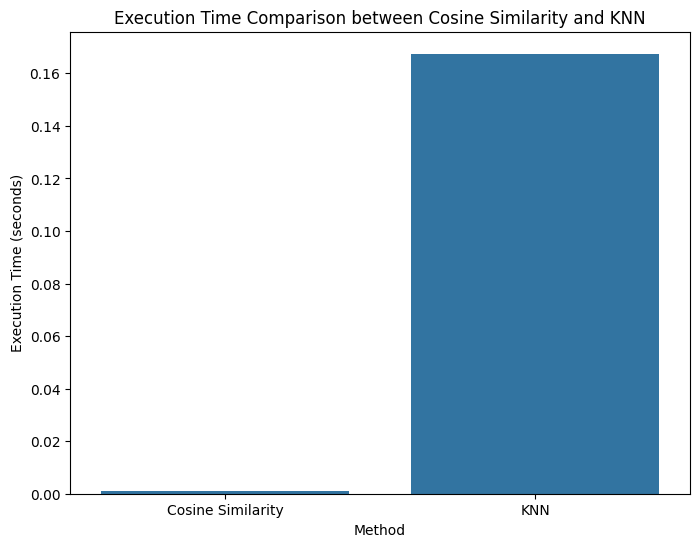

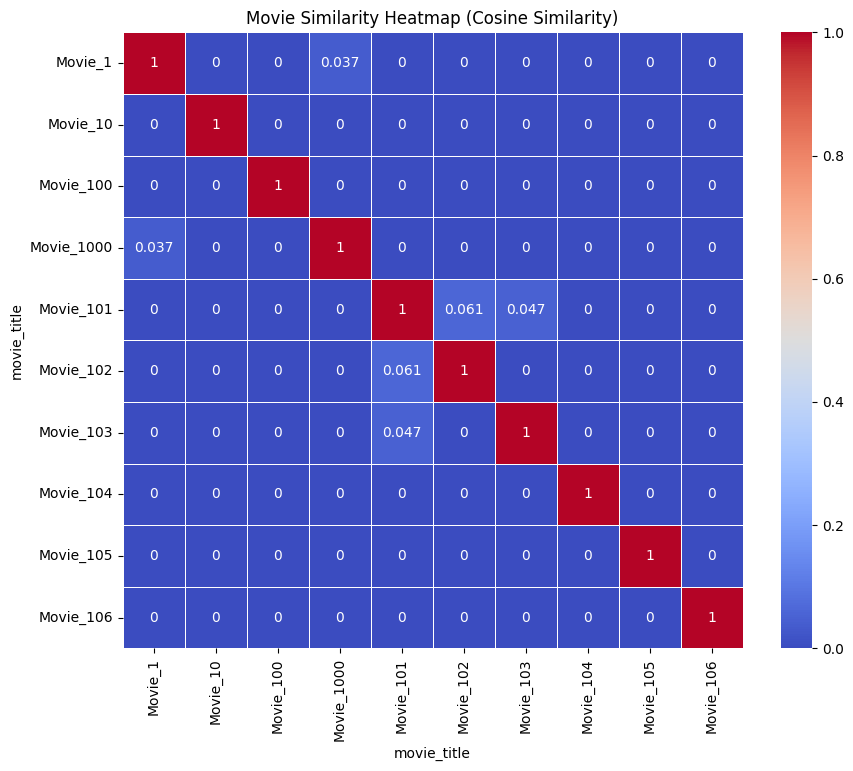

In [26]:
#Step 8: Visualization

# Create a DataFrame for visualization
results = pd.DataFrame({
    'Method': ['Cosine Similarity', 'KNN'],
    'Execution Time (seconds)': [cosine_time, knn_time]
})

# Plot Execution Time comparison
plt.figure(figsize=(8, 6))
sns.barplot(x='Method', y='Execution Time (seconds)', data=results)
plt.title('Execution Time Comparison between Cosine Similarity and KNN')
plt.show()

# Visualize the similarity heatmap for Cosine Similarity (for a few movies)
plt.figure(figsize=(10, 8))
subset_movies = movie_similarity_df.iloc[:10, :10]  # Subset for visualization
sns.heatmap(subset_movies, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Movie Similarity Heatmap (Cosine Similarity)')
plt.show()